# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy
from pprint import pprint


'0a943a5b0c9fe18e14f2d0c890d15e8b'

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)


# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
     

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")



Number of cities in the list: 607


In [3]:
print(cities)
url = f"https://api.openweathermap.org/data/2.5/weather?q={cities}&appid={weather_api_key}&units=imperial"

response=requests.get(url)

if response.status_code == 200:
    print('yay!')
else:
    print('boo')



['margaret river', 'grytviken', 'kapuskasing', 'saint-francois', 'yellowknife', 'kirensk', 'foindu', 'hamilton', "'ohonua", 'ust-nera', 'badger', 'gunjur', 'vallenar', 'saipan', 'pitimbu', 'vila velha', 'wamba', 'mahavelona', 'tura', 'petropavlovsk-kamchatsky', 'ushuaia', 'west island', 'trincomalee', 'bethel', 'vorgashor', 'port-aux-francais', 'qaqortoq', 'buala', 'hermanus', 'albany', 'puerto ayora', 'manokwari', 'chonchi', 'olonkinbyen', 'bredasdorp', 'mantua', 'blackmans bay', 'rakops', 'tiksi', 'tougan', 'weno', 'fuglafjordur', 'pariaman', 'nemuro', 'paseh', 'huntsville', 'richards bay', 'trairi', 'salalah', 'al kharijah', 'messaad', 'collinsville', 'udachny', 'serdar', 'aydintepe', 'iqaluit', 'edinburgh of the seven seas', 'kavaratti', 'willowmore', 'cidade velha', 'papatowai', 'hadibu', 'longyearbyen', 'tralee', 'waitangi', 'port mathurin', 'huarmey', 'whitehorse', 'namie', "novhorod-sivers'kyy", 'bodo', 'selfoss', 'yermentau', "st. john's", 'samitah', 'talnakh', 'la cruz', 'zhe

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Define an empty list to fetch the weather data for each city
city_data = []



In [5]:
# Define an empty list to fetch the weather data for each city
city_data = []
units = 'imperial'
# Build query URL
# query_url = f"{url}appid={weather_api_key}&units={units}&q="
# Print to logger
print("Beginning Data Retrieval     ")

print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units={units}"



    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather =  requests.get(city_url).json()
        

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({
            "City": city,
            "Lat": city_lat,
            "Lng": city_lng,
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date
        })

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
    # pause to avoid rate limiting

        time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | margaret river
Processing Record 2 of Set 1 | grytviken
Processing Record 3 of Set 1 | kapuskasing
Processing Record 4 of Set 1 | saint-francois
Processing Record 5 of Set 1 | yellowknife
Processing Record 6 of Set 1 | kirensk
Processing Record 7 of Set 1 | foindu
Processing Record 8 of Set 1 | hamilton
Processing Record 9 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 10 of Set 1 | ust-nera
Processing Record 11 of Set 1 | badger
Processing Record 12 of Set 1 | gunjur
Processing Record 13 of Set 1 | vallenar
Processing Record 14 of Set 1 | saipan
Processing Record 15 of Set 1 | pitimbu
Processing Record 16 of Set 1 | vila velha
Processing Record 17 of Set 1 | wamba
Processing Record 18 of Set 1 | mahavelona
Processing Record 19 of Set 1 | tura
Processing Record 20 of Set 1 | petropavlovsk-kamchatsky
Processing Record 21 of Set 1 | ushuaia
Processing Record 22 of Set 1 | west isl

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_weatherdf = pd.DataFrame(city_data)



In [8]:
city_weatherdf = city_weatherdf.dropna()

In [9]:
# Show Record Count
city_weatherdf.count()

City          580
Lat           580
Lng           580
Max Temp      580
Humidity      580
Cloudiness    580
Wind Speed    580
Country       580
Date          580
dtype: int64

In [11]:
# Display sample data
city_weatherdf.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,margaret river,-33.9500,115.0667,58.37,51,9,11.43,AU,1732578401
1,grytviken,-54.2811,-36.5092,34.39,83,100,6.73,GS,1732578401
2,kapuskasing,49.4169,-82.4331,30.29,100,100,4.61,CA,1732578219
3,saint-francois,46.4154,3.9054,47.64,94,100,4.61,FR,1732578333
4,yellowknife,62.4560,-114.3525,19.42,94,100,18.41,CA,1732578402


In [12]:
# Convert datetime to readable date format
city_weatherdf['Date']=(pd.to_datetime(city_weatherdf['Date'],unit='s')).dt.date
city_weatherdf.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,margaret river,-33.9500,115.0667,58.37,51,9,11.43,AU,2024-11-25
1,grytviken,-54.2811,-36.5092,34.39,83,100,6.73,GS,2024-11-25
2,kapuskasing,49.4169,-82.4331,30.29,100,100,4.61,CA,2024-11-25
3,saint-francois,46.4154,3.9054,47.64,94,100,4.61,FR,2024-11-25
4,yellowknife,62.4560,-114.3525,19.42,94,100,18.41,CA,2024-11-25


In [13]:
# Export the City_Data into a csv
city_weatherdf.to_csv("city_weather_data.csv", index=False)

In [19]:
# Read saved data
weather_df = pd.read_csv("city_weather_data.csv", index_col="City")

# Display sample data
weather_df.head()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City,,,,,,,,
margaret river,-33.9500,115.0667,58.37,51,9,11.43,AU,2024-11-25
grytviken,-54.2811,-36.5092,34.39,83,100,6.73,GS,2024-11-25
kapuskasing,49.4169,-82.4331,30.29,100,100,4.61,CA,2024-11-25
saint-francois,46.4154,3.9054,47.64,94,100,4.61,FR,2024-11-25
yellowknife,62.4560,-114.3525,19.42,94,100,18.41,CA,2024-11-25


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Denis\\OneDrive\\Desktop\\Python-Api-Challenge\\Python-Api-Challenge\\WeatherPy1\\output_data\\Fig1.png'

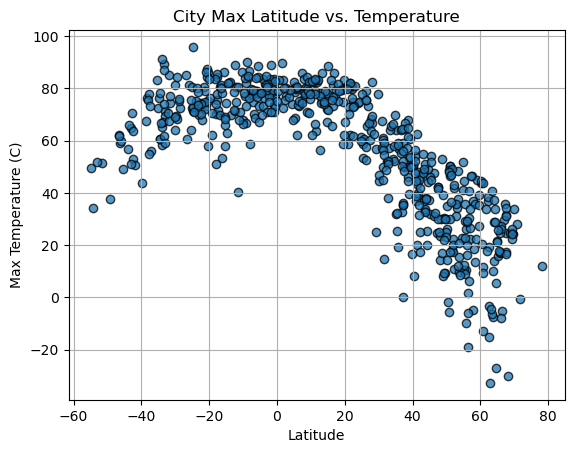

In [34]:
# add date/time for extra detail to data visualization
from datetime import datetime
date_time = datetime.date(datetime.now())


##### Build scatter plot for latitude vs. temperature
plt.scatter(weather_df['Lat'], weather_df['Max Temp'], edgecolors='black', alpha=0.75)

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()



#### Latitude Vs. Humidity

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Denis\\OneDrive\\Desktop\\Python-Api-Challenge\\Python-Api-Challenge\\WeatherPy1\\output_data\\Fig2.png'

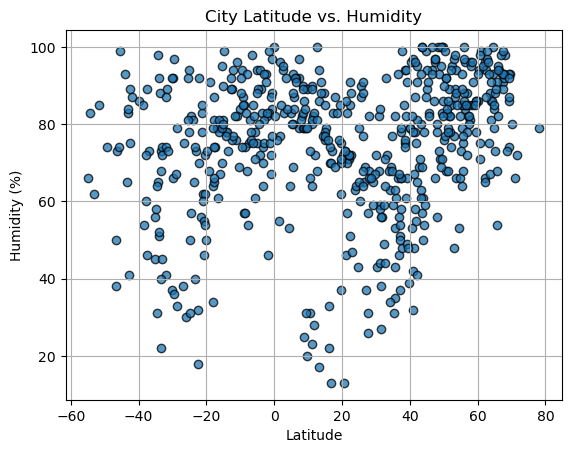

In [35]:
# add date/time for extra detail to data visualization
date_time = datetime.date(datetime.now())

 ##### Build the scatter plots for latitude vs. humidity
plt.scatter(weather_df['Lat'], weather_df['Humidity'], edgecolors='black', alpha=0.75)

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Denis\\OneDrive\\Desktop\\Python-Api-Challenge\\Python-Api-Challenge\\WeatherPy1\\output_data\\Fig3.png'

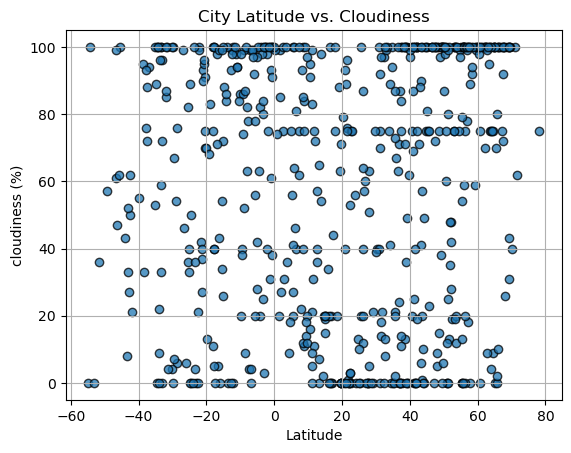

In [36]:
 ##### Build the scatter plots for latitude vs. cloudiness
plt.scatter(weather_df['Lat'], weather_df['Cloudiness'], edgecolors='black', alpha=0.75)

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Denis\\OneDrive\\Desktop\\Python-Api-Challenge\\Python-Api-Challenge\\WeatherPy1\\output_data\\Fig4.png'

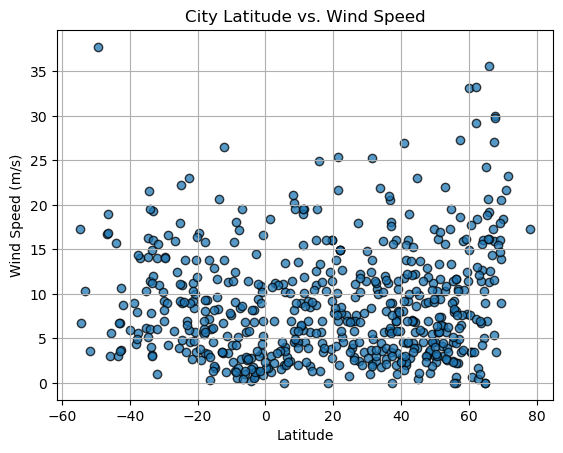

In [37]:
##### Build the scatter plots for latitude vs. wind speed
plt.scatter(weather_df['Lat'], weather_df['Wind Speed'], edgecolors='black', alpha=0.75)

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [25]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x, y, x_label, y_label, title):
    # Perform linear regression
    slope, intercept, rvalue, pvalue, stderr = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))



In [26]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = weather_df[weather_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City,,,,,,,,
kapuskasing,49.4169,-82.4331,30.29,100,100,4.61,CA,2024-11-25
saint-francois,46.4154,3.9054,47.64,94,100,4.61,FR,2024-11-25
yellowknife,62.4560,-114.3525,19.42,94,100,18.41,CA,2024-11-25
kirensk,57.7853,108.1119,-4.92,96,89,6.55,RU,2024-11-25
foindu,7.4108,-11.5422,75.51,92,62,2.44,SL,2024-11-25


In [27]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = weather_df[weather_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City,,,,,,,,
margaret river,-33.9500,115.0667,58.37,51,9,11.43,AU,2024-11-25
grytviken,-54.2811,-36.5092,34.39,83,100,6.73,GS,2024-11-25
vallenar,-28.5708,-70.7581,72.59,33,6,4.25,CL,2024-11-25
pitimbu,-7.4706,-34.8086,77.85,75,4,8.39,BR,2024-11-25
vila velha,-20.3297,-40.2925,75.15,72,75,3.44,BR,2024-11-25


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7128516826772868


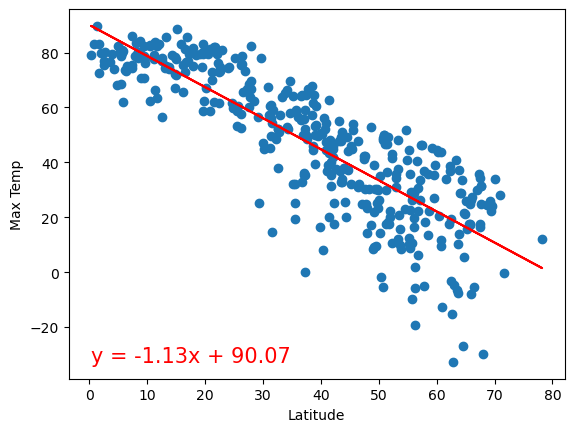

In [30]:
 ##### Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

# Drop values that are not a number
x = x_values.dropna()
y = y_values.dropna()

# Create the plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
plt.annotate(line_eq,(x_values.min(), y_values.min()),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.2653259727298062


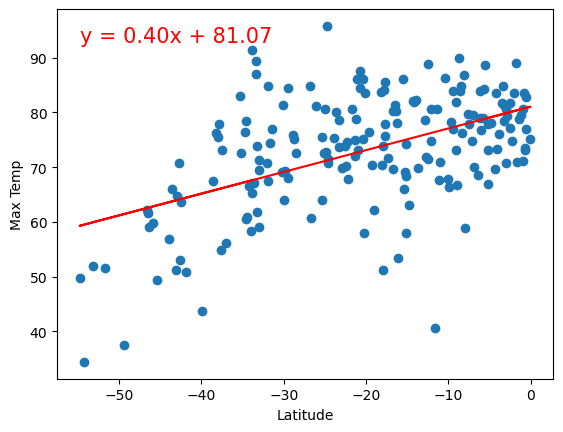

In [31]:
##### Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

# Drop values that are not a number
x = x_values.dropna()
y = y_values.dropna()

# Create the plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
plt.annotate(line_eq,(x_values.min(), y_values.max()), ha='left', va='top',fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue**2}")
plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.07559646090287547


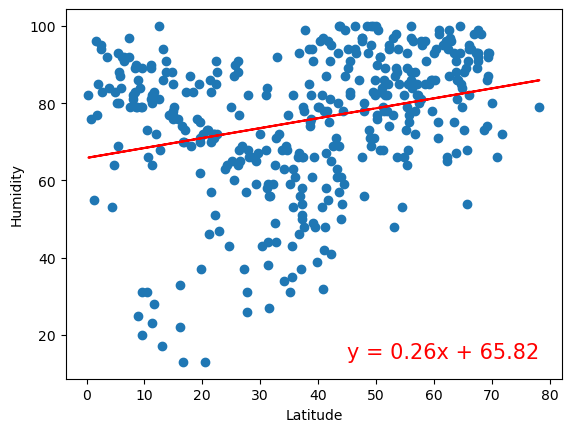

In [32]:
##### Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

# Drop values that are not a number
x = x_values.dropna()
y = y_values.dropna()

# Create the plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
plt.annotate(line_eq,(x_values.max(), y_values.min()), ha='right', va='bottom', fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.07980648977987216


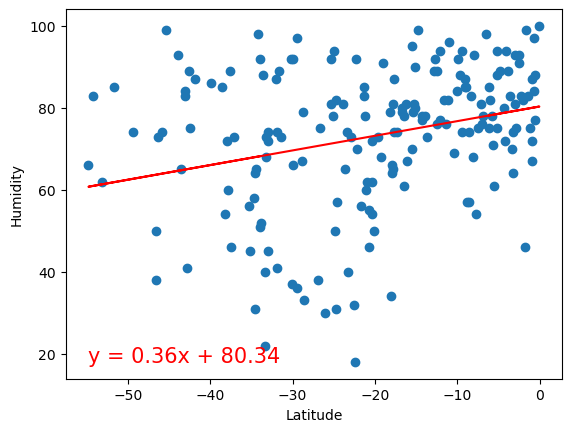

In [33]:
##### Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

# Drop values that are not a number
x = x_values.dropna()
y = y_values.dropna()

# Create the plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
plt.annotate(line_eq,(x_values.min(), y_values.min()), fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.07541990691198715


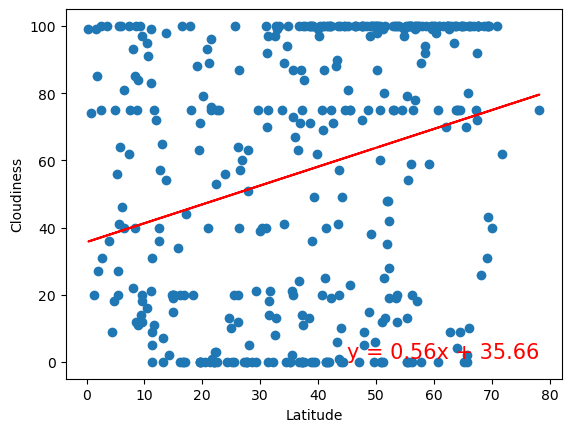

In [38]:
 ##### Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

# Drop values that are not a number
x = x_values.dropna()
y = y_values.dropna()

# Create the plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
plt.annotate(line_eq,(x_values.max(), y_values.min()), ha='right', va='bottom', fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.032036386191000396


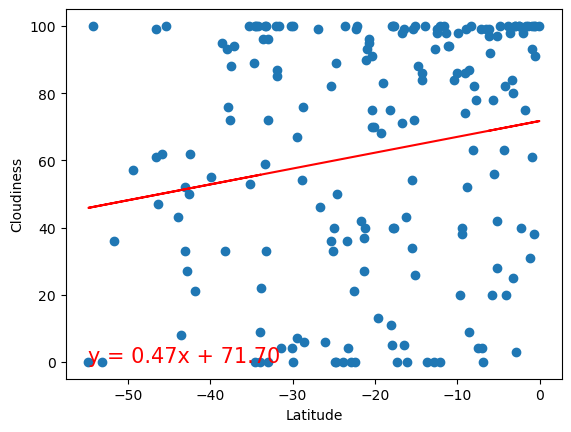

In [39]:
##### Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

# Drop values that are not a number
x = x_values.dropna()
y = y_values.dropna()

# Create the plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
plt.annotate(line_eq,(x_values.min(), y_values.min()), fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.039490936263478396


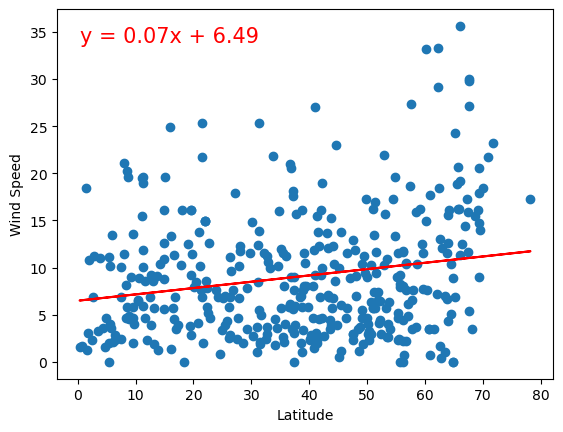

In [40]:
 ##### Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

# Drop values that are not a number
x = x_values.dropna()
y = y_values.dropna()

# Create the plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
plt.annotate(line_eq,(x_values.min(), y_values.max()), ha='left', va='top', fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.09628760737481484


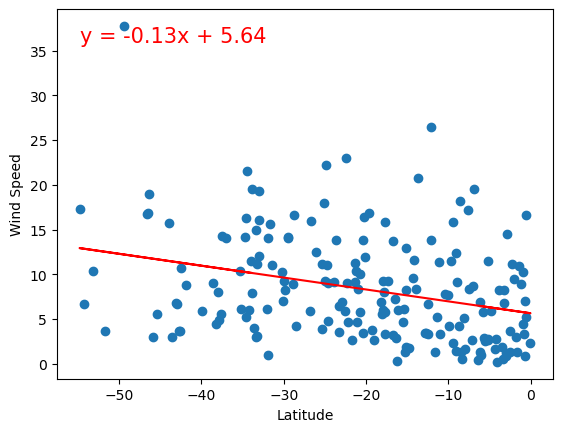

In [41]:
 ##### Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

# Drop values that are not a number
x = x_values.dropna()
y = y_values.dropna()

# Create the plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
plt.annotate(line_eq,(x_values.min(), y_values.max()), ha='left', va='top', fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE